# 1. Exploratory data analysis

## 1.1 Import and preprocess data

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def import_iris_dataset():
    data = pd.read_csv('iris.csv', delimiter=',',header=None)
    data = pd.DataFrame(data)
    print(data)
    X = np.column_stack((data[0],data[1],data[2],data[3]))
    y = data[4]


    classes = np.unique(y)
    class_map = {}

    for value,key in enumerate(classes):
        class_map[key] = value

    y = np.array([class_map[key] for key in y],dtype = int)
    return np.array(X,dtype=float),y,class_map

X,y,class_map = import_iris_dataset()


       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


## 1.3 Visualazation of the data

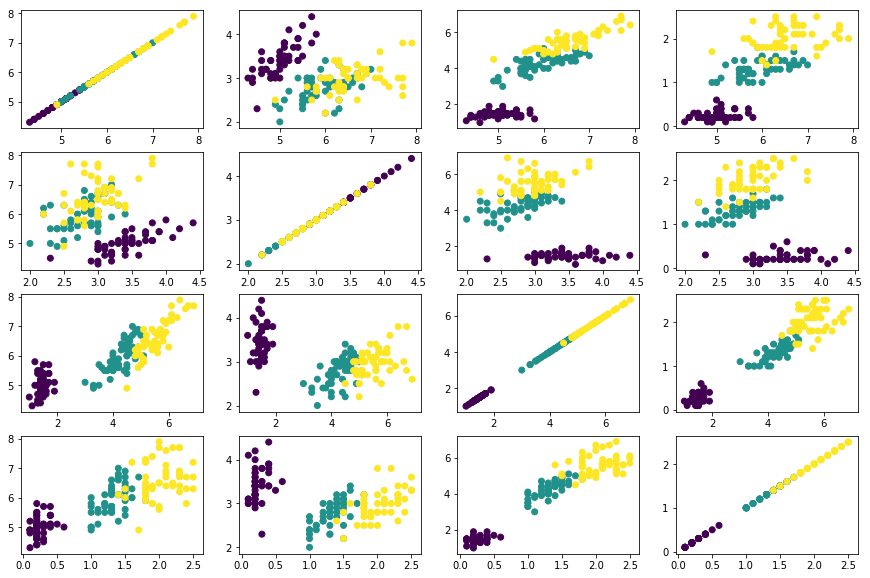

In [96]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(15,10))
for i in range(4):
    for j in range(4):
        ax[i,j].scatter(X[:,i],X[:,j],c=y)


# 2.Distance between the points

## 2.1 Compute distance between reduced data set

Here the distance between all combinations of points in Reduced_x has been found.

In [96]:
Reduced_data = np.array([X[1],X[40],X[55],X[87],X[130]])
Reduced_X = np.column_stack((Reduced_data[:,0],Reduced_data[:,1]))
Reduced_y = np.array([y[1],y[40],y[55],y[87],y[130]])
Reduced_y = Reduced_y.flatten()


distance = np.array([])
for i in Reduced_X:
    for j in Reduced_X:
        dist = np.linalg.norm(i-j)
        distance = np.append(distance,dist)

## 2.2 Compute distance matrix(more general)

Here the distance between the point p and the 2d array of x has been found.

In [153]:
def distance_matrix(P,Q):
    distance_matrix = np.array([])
    for i in P:
        for j in Q:
            dist = np.linalg.norm(i-j)
            distance_matrix = np.append(distance_matrix,dist)
    return distance_matrix


p = np.array([[6,3],[0,0]])
nrows,ncols = p.shape
nrows1,ncols1 = Reduced_X.shape
Red_Distance = np.reshape(distance_matrix(p,Reduced_X),((nrows,nrows1)))
Red_Distance

array([[1.1       , 1.11803399, 0.36055513, 0.76157731, 1.41421356],
       [5.74543297, 6.10327781, 6.35059052, 6.70671305, 7.91201618]])

## 2.3  Visualize distance matrix

Here the distance between the reduced X and the first 2 columns of the iris data set has been found

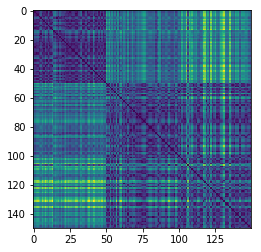

In [122]:
data = pd.read_csv('iris.csv', delimiter=',',header=None)
data = pd.DataFrame(data)
Iris_dataset = np.column_stack((data[0],data[1]))


Distance_matrix = np.reshape(distance_matrix(Iris_dataset,Iris_dataset),((150,150)))
plt.imshow(Distance_matrix);

# 3. Finding classes of k closest points

## 3.1 Find the ordering of the points that are closest to another point

Found the distance between a point p and a 2d array of points X. From that the points closer top p are found out by sorting the distance array using arg.sort and their corresponding y_label is found.

In [138]:
Closest_Red_points = np.argsort(Red_Distance,axis=-1) #For sorting the arguments of the array for finding the points closest to p
Closest_Red_y = Reduced_y[Closest_Red_points] #Using the sarguments above to get the corresponding y labels
Closest_Red_y

array([[1, 1, 0, 0, 2],
       [0, 0, 1, 1, 2]])

## 3.2 Finding the k closest points between two sets of points

In this section, the distance between all the points in X(First two column of full data) has been found. Their srguments are then sorted to find which label(Flowers) is closer to the given point.

In [152]:
Closest_full_points = np.argsort(Distance_matrix,axis=-1) #For sorting each row of the array to find the closest point to the point corresponding to each row
Closest_full_y = y[Closest_full_points]


# 4. Implementing the k-nearest neighbour algorthim

## 4.1 Setting up the code and implementing the k-nearest neighbours

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

p = np.array([[7.5,3]])
def import_iris_dataset():
    data = pd.read_csv('iris.csv', delimiter=',',header=None)
    data = pd.DataFrame(data)
    X = np.column_stack((data[0],data[1],data[2],data[3]))
    y = data[4]


    classes = np.unique(y)
    class_map = {}

    for value,key in enumerate(classes):
        class_map[key] = value

    y = np.array([class_map[key] for key in y],dtype = int)
    return np.array(X,dtype=float),y,class_map

X,y,class_map = import_iris_dataset()
X = X[:,:2]
# print(y)

def distance_matrix(a,b):
    distance_matrix = np.array([])
    for i in a:
        for j in b:
            dist = np.linalg.norm(i-j)
            distance_matrix = np.append(distance_matrix,dist)
    return distance_matrix

Distance_matrix = np.reshape(distance_matrix(X,X),((150,150)))



def train_test_split(X,y,split=0.6):
    Total_rows = len(X)
    idx = np.arange(Total_rows)
    np.random.shuffle(idx)
    
    
    train_percent  = int(split*Total_rows)
    train_idx = idx[:train_percent]
    test_idx  = idx[train_percent:]
    
    X_train = X[train_idx]
    y_train = y[train_idx]
    
    X_test  = X[test_idx]
    y_test  = y[test_idx]
    
    return X_train,y_train,X_test,y_test
    
X_train,y_train,X_test,y_test = train_test_split(X,y,split=0.6)                          
size1 = len(X_train)                 

    
class KNN:
    def __init__(self,k_neighbours):
        self.k_neighbours = k_neighbours
        
    
    def fit(self,X_train,y_train):
        X_train = X_train
        y_train = y_train
        return X_train,y_train
        
        
    def predict(self,X,size1,size2):
        X_func,y_func = self.fit(X_train,y_train)
        Distance_matrix = np.reshape(distance_matrix(X,X_func),((size1,size2)))
        Closest_distance = np.argsort(Distance_matrix,axis=-1)
        Closest_points = y_func[Closest_distance]
        k_closest_points = Closest_points[:,:self.k_neighbours]
        
        
        prediction = np.array([])
        for i in k_closest_points:
            predict = np.bincount(i).argmax()
            prediction=np.append(prediction,predict)
        
          # For one coordinate point--For testing purpose
#         Distance_matrix = distance_matrix(p,X)
#         Closest_distance = np.argsort(Distance_matrix)
#         Closest_points = y_train[Closest_distance]
#         k_closest_points = Closest_points[:self.k_neighbours]
#         prediction = np.bincount(k_closest_points).argmax()
        
        return prediction

    
learner = KNN(k_neighbours=3)
learner.fit(X_train,y_train)
learner.predict(X_train,size1,size1)

array([0., 2., 0., 0., 1., 2., 0., 0., 2., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 2., 1., 2., 2., 0., 0., 1., 2., 2., 1., 2., 2., 2., 2.,
       1., 2., 1., 2., 2., 2., 0., 2., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 2., 2., 2., 1., 0., 1., 2., 1., 2., 2.,
       0., 1., 0., 2., 1., 2., 2., 1., 1., 1., 0., 2., 0., 0., 2., 0., 2.,
       2., 1., 0., 0., 1.])

## 4.2 Decision boundary for the first two features

[1. 1. 1. 1. 2. 0. 1. 1. 2. 2. 0. 0. 1. 2. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2.
 2.]


TypeError: Illegal arguments to pcolormesh; see help(pcolormesh)

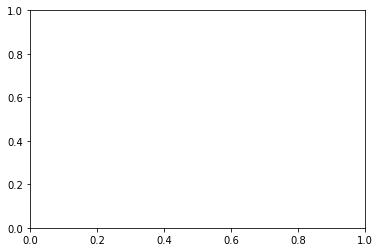

In [251]:
X_axis_min = int(round(np.amin(X[:,0])))
X_axis_max = int(round(np.amax(X[:,0])))

Y_axis_min = int(round(np.amin(X[:,1])))
Y_axis_max = int(round(np.amax(X[:,1]))) 


a = np.linspace(X_axis_min,X_axis_max,5)
b = np.linspace(Y_axis_min,Y_axis_max,5)

aa,bb = np.meshgrid(a,b)
coordinates=np.column_stack((aa.flatten(),bb.flatten()))
size2 = len(coordinates)


coordinate_learner = KNN(k_neighbours=4)
coordinate_learner.fit(X_train,y_train)
ans=coordinate_learner.predict(coordinates,size2,size1)
print(ans)
# plt.plot(ans,ans)
plt.pcolormesh(aa,bb)